In [1]:
import torch

import torchvision
import os
from pathlib import Path
import time

# Import libraries
import os
import time
import random
import numpy as np
from numpy import argmax
import pandas as pd
import json
from collections import OrderedDict, namedtuple
from itertools import product
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [3]:
if IN_COLAB:

    from google.colab import drive
    drive.mount('/drive', force_remount=True)
    datadir = '/drive/My Drive/Colab Notebooks/Datasets/'
    optim_dir = datadir + '/optim_dir/'
    results_folder = datadir+'/results/'
    Path(results_folder).mkdir(parents=True, exist_ok=True)
    Path(optim_dir).mkdir(parents=True, exist_ok=True)
else:
  results_folder = 'results'
  optim_dir = 'optim_dir'
  Path("results").mkdir(parents=True, exist_ok=True)
  Path(optim_dir).mkdir(parents=True, exist_ok=True)


# from opfunu.cec_basic.cec2014_nobias import *
# from mealpy.swarm_based.PSO import BasePSO

Mounted at /drive


In [4]:
import sys
if IN_COLAB:
  
  scripts_dir = '/drive/My Drive/Colab Notebooks/scripts/'
  sys.path.insert(1, scripts_dir)
# from opfunu.cec_basic.cec2014_nobias import *
# from mealpy.swarm_based.PSO import BasePSO

# insert at 1, 0 is the script path (or '' in REPL)
else:
    sys.path.insert(1, 'scripts')
from geneticalgorithm import geneticalgorithm as ga
from PSO import BasePSO

In [5]:
# Enable GPU processing
if IN_COLAB:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else:
    device = torch.device("cpu")
print(f'Device type: {device}')

Device type: cuda


In [6]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)


In [7]:
def run_train_model(agent):
  print(agent)
  res = agent[0] * agent[1] + 2 * agent[0] + agent[1]
  return res

In [8]:
# Set random seed
seed = 777
torch.manual_seed(seed)
model = None

In [9]:
timestr = time.strftime("%Y%m%d-%H%M%S")
filename = f'Run_Results-PSO-{timestr}'

[  0.61065494 605.41086281]
[2.48145659e-01 9.20260823e+02]
[   3.34101354 1854.06709845]
[   2.90795594 1537.22394762]
[1.07682027e+00 1.28841455e+03]
[  0.37349303 160.29208534]
[  2.35845501 687.33773591]
[   3.95550459 1253.31993925]
[   2.72711712 1104.96137066]
[  1.07544023 747.14551349]
[  0.8917124  373.69875811]
[  1.56259237 387.13164887]
[   2.44364373 1765.73408609]
[  2.4893553  506.98476946]
[7.19721227e-01 1.63299253e+03]
iterations 1
[  0.61065494 605.41086281]
[  0.86994319 747.14551349]
[  1.07544023 605.41086281]
[6.10654940e-01 7.47145513e+02]
[  1.26048712 747.14551349]
[  1.07544023 605.41086281]
[  1.07544023 747.14551349]
[  1.07544023 747.14551349]
[  1.07544023 747.14551349]
[  1.07544023 747.14551349]
iterations 2
[  1.07544023 747.14551349]
[  1.07544023 747.14551349]
[2.27902635e-01 1.74864195e+03]
[  0.86994319 747.14551349]
[  1.07544023 747.14551349]
[8.69943187e-01 1.03052275e+03]
[  0.86994319 797.76672031]
[8.69943187e-01 1.70713128e+03]
[  3.0812080

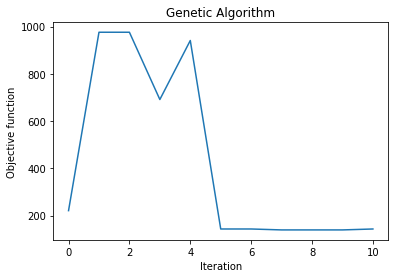

In [10]:
verbose = True
obj_func = run_train_model

lb = [0, 1]
ub = [4, 2000]

algorithm_param = {'max_num_iteration': 10,\
                   'population_size':15,\
                   'mutation_probability':0.2,\
                   'elit_ratio': 0.0,\
                   'crossover_probability': 0.8,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

problem_size = len(ub)

pc = 0.95
pm = 1 - pc

varbound = np.array([ [ lb[0], ub[0] ], [ lb[1], ub[1] ] ] )

model=ga(function=run_train_model,dimension=2,variable_type='real',variable_boundaries=varbound, random_seed=777, algorithm_parameters=algorithm_param, function_timeout=1000)
model.run(f"{optim_dir}/ga_data-{timestr}.data")

# m.save_output(filename)

In [11]:
verbose = True
pop_size = 15   
max_iter = 10

obj_func = run_train_model

lb = [0, 1]
ub = [4, 2000]

md2 = BasePSO(obj_func, lb, ub, verbose, max_iter, pop_size, random_seed=777)  # Remember the keyword "problem_size"
best_pos1, best_fit1, list_loss1 = md2.train(f"{optim_dir}/pso_data-{timestr}.data")
print(md2.solution[1])

# m.save_output(f'{results_folder}/{filename}')
# print('Results saved.')


[  0.61065494 605.41086281]
[2.48145659e-01 9.20260823e+02]
[   3.34101354 1854.06709845]
[   2.90795594 1537.22394762]
[1.07682027e+00 1.28841455e+03]
[  0.37349303 160.29208534]
[  2.35845501 687.33773591]
[   3.95550459 1253.31993925]
[   2.72711712 1104.96137066]
[  1.07544023 747.14551349]
[  0.8917124  373.69875811]
[  1.56259237 387.13164887]
[   2.44364373 1765.73408609]
[  2.4893553  506.98476946]
[7.19721227e-01 1.63299253e+03]
[  0.83817906 752.46662744]
[  1.30321686 377.63303114]
[ 1.00124009 13.09240308]
[3.94065256e-01 1.78377353e+03]
[  2.34005521 623.38879202]
[  1.26734621 588.59745704]
[   3.57283439 1071.15034291]
[  3.56326415 702.56332292]
[1.01458756e+00 1.93053696e+03]
[   1.84817002 1122.5950005 ]
[  1.24715459 427.32512424]
[  1.30904406 100.18894062]
[   1.13027584 1064.65380916]
[  2.08129861 920.77033464]
[  1.09918777 609.38394167]
>Epoch: 2, Best fit: 28.203522122632528
[  1.17364437 273.65531836]
[  1.66758355 296.08007843]
[ 1.85343286 23.73511877]
[  1